[[0.07950544 0.01255345]
 [0.16324637 0.07191803]
 [0.07644199 0.13885885]
 ...
 [0.03255684 0.43032833]
 [0.0181761  0.01573641]
 [0.01407325 0.02116676]]
Max distance: 2.683175143175605


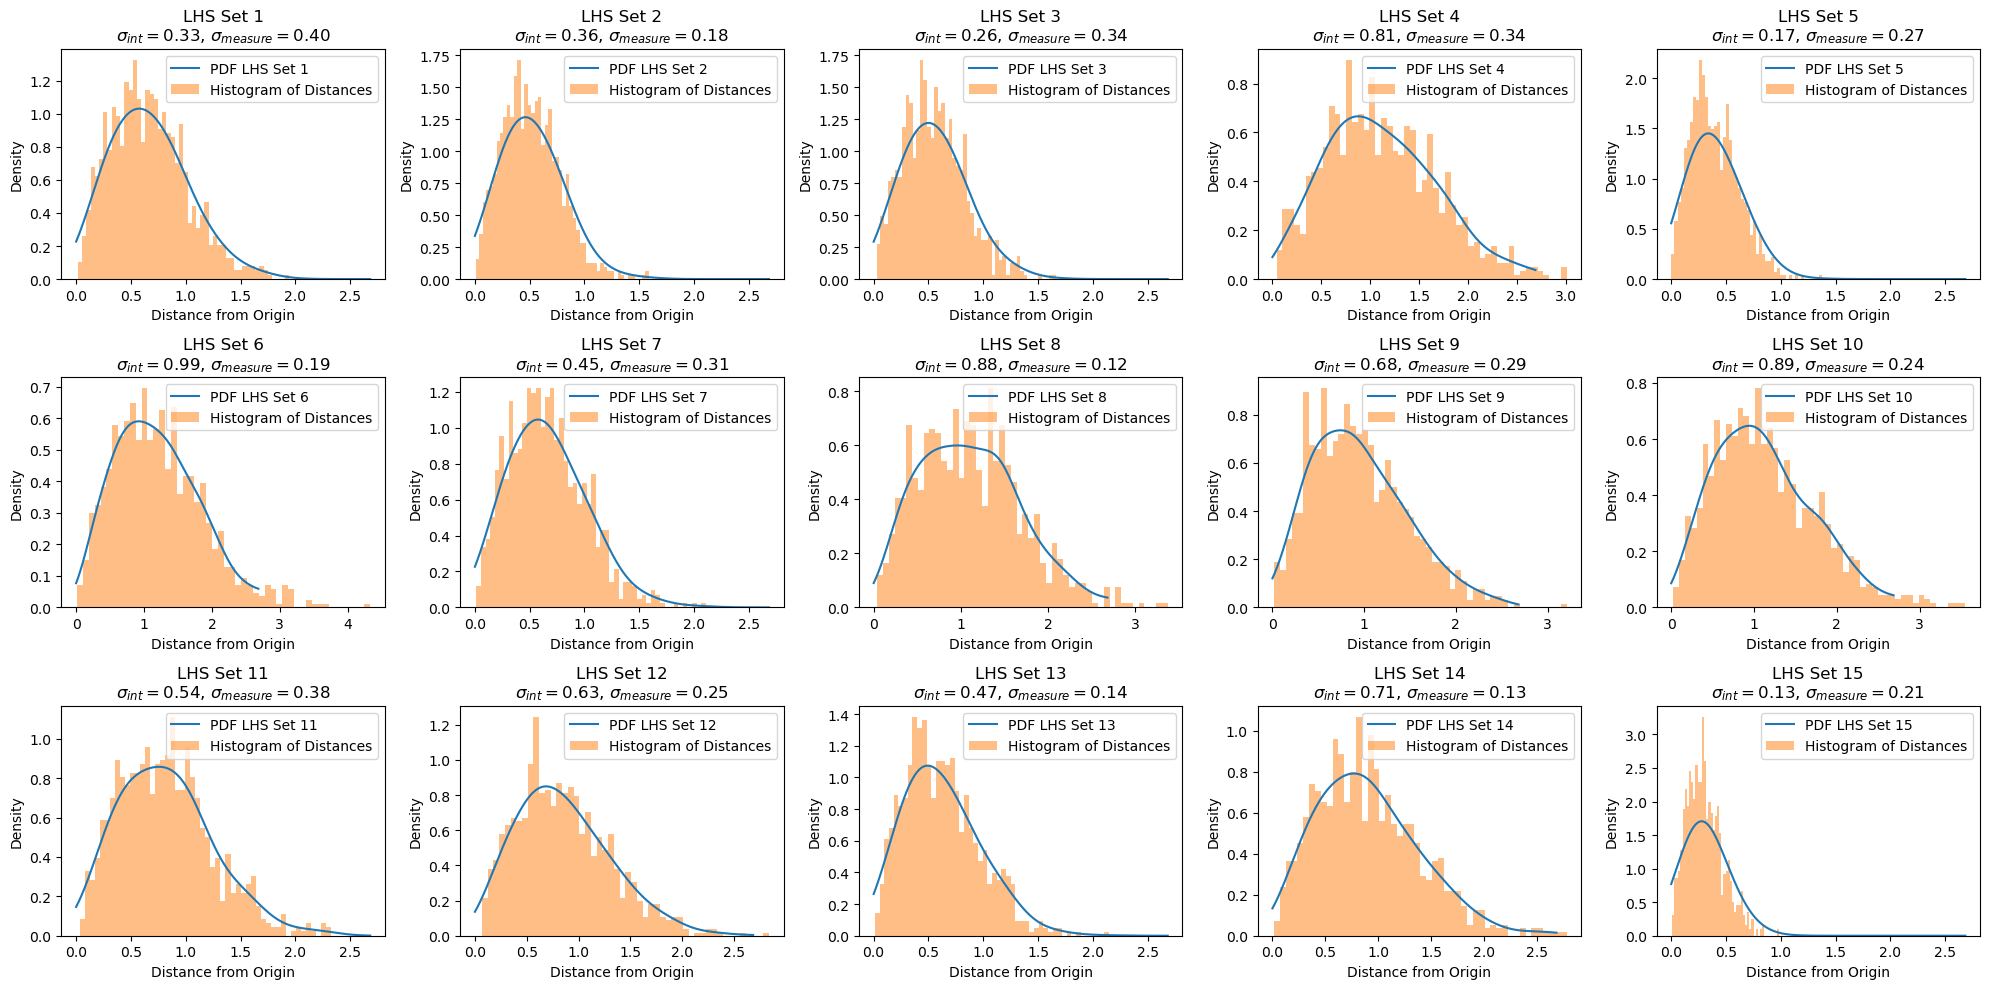

[[0.07950544 0.01255345]
 [0.16324637 0.07191803]
 [0.07644199 0.13885885]
 ...
 [0.03255684 0.43032833]
 [0.0181761  0.01573641]
 [0.01407325 0.02116676]]
Max distance: 2.683175143175605


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from pyDOE import lhs
import pandas as pd

# Funzione per generare i dati con estrazione montecarlo 2D
def generate_data_2d(sigma_int, sigma_measure, num_samples=1000):
    # Genera 1000 punti da una gaussiana 2D con varianza sigma_int
    mc_data_int = np.random.multivariate_normal(mean=[0, 0], cov=[[sigma_int**2, 0], [0, sigma_int**2]], size=num_samples)
    # Genera una distribuzione gaussiana 2D con varianza sigma_measure su ciascun punto
    mc_data_measure = np.random.multivariate_normal(mean=[0, 0], cov=[[sigma_measure**2, 0], [0, sigma_measure**2]], size=num_samples)
    mc_data_combined = mc_data_int + mc_data_measure
    return mc_data_combined

# Funzione per calcolare la distanza dall'origine per ogni punto
def calculate_distance(data):
    return np.linalg.norm(data, axis=1)

# Funzione per calcolare la distribuzione PDF tramite KDE
def calculate_pdf(distances, bandwidth=0.1):
    kde = KernelDensity(bandwidth=bandwidth)
    kde.fit(distances[:, np.newaxis])
    x_vals = np.linspace(0, np.max(distances), 1000)[:, np.newaxis]
    log_density = kde.score_samples(x_vals)
    return np.exp(log_density), x_vals

# Funzione principale per generare dati, calcolare distanze e stimare PDF tramite KDE
def generate_and_plot_pdf(sigma_int, sigma_measure, num_samples=1000, bandwidth=0.1):
    # Genera i dati
    mc_data = generate_data_2d(sigma_int, sigma_measure, num_samples)
    
    # Calcola la distanza dall'origine per ogni punto
    distances = calculate_distance(mc_data)
    
    # Calcola la distribuzione PDF tramite KDE sulle distanze dall'origine
    pdf, x_vals = calculate_pdf(distances, bandwidth=bandwidth)
    
    return distances, pdf, x_vals

# Funzione per generare una griglia LHS e applicare la funzione precedente a ciascun punto
def lhs_and_plot(num_points=15, num_samples=1000, bandwidth=0.1):
    # Genera una griglia LHS a due parametri
    lhs_samples = lhs(2, samples=num_points)
    
    # Scala i campioni LHS ai range desiderati per sigma_int e sigma_measure
    sigma_int_lhs = lhs_samples[:, 0] * 0.8  # Range [0, 0.8]
    sigma_measure_lhs = lhs_samples[:, 1] * 0.1  # Range [0, 0.1]
    
    plt.figure(figsize=(20, 10))
    
    # Applica la funzione a ciascun punto della griglia LHS
    for i in range(num_points):
        sigma_int = sigma_int_lhs[i]
        sigma_measure = sigma_measure_lhs[i]
        
        distances, pdf, x_vals = generate_and_plot_pdf(sigma_int, sigma_measure, num_samples, bandwidth)
        
        # Plot della distribuzione PDF e dell'istogramma delle distanze
        plt.subplot(3, (num_points + 2) // 3, i + 1)
        plt.plot(x_vals, pdf, label=f'PDF LHS Set {i+1}')
        plt.hist(distances, bins=50, density=True, alpha=0.5, label='Histogram of Distances')
        plt.title(f'LHS Set {i+1}\n$\sigma_{{int}}={sigma_int:.2f}$, $\sigma_{{measure}}={sigma_measure:.2f}$')
        plt.xlabel('Distance from Origin')
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Esecuzione della funzione con i dati da CSV
data = pd.read_csv('dati.csv')
error = data['ERROR'].values
distance = data['DISTANCE'].values

# Combina i dati in un array
data_array = np.vstack((error, distance)).T
print(data_array)

# Calcola il massimo valore di distanza
max_distance = np.max(distance)
print(f"Max distance: {max_distance}")

# Funzione modificata per calcolare la PDF con il massimo valore di x impostato
def calculate_pdf_with_max(distances, max_val, bandwidth=0.1):
    kde = KernelDensity(bandwidth=bandwidth)
    kde.fit(distances[:, np.newaxis])
    x_vals = np.linspace(0, max_val, 1000)[:, np.newaxis]
    log_density = kde.score_samples(x_vals)
    return np.exp(log_density), x_vals

# Modifica della funzione principale per usare il nuovo calcolo della PDF
def generate_and_plot_pdf_with_max(sigma_int, sigma_measure, max_val, num_samples=1000, bandwidth=0.1):
    # Genera i dati
    mc_data = generate_data_2d(sigma_int, sigma_measure, num_samples)
    
    # Calcola la distanza dall'origine per ogni punto
    distances = calculate_distance(mc_data)
    
    # Calcola la distribuzione PDF tramite KDE sulle distanze dall'origine
    pdf, x_vals = calculate_pdf_with_max(distances, max_val, bandwidth=bandwidth)
    
    return distances, pdf, x_vals

# Funzione modificata per generare una griglia LHS e applicare la funzione precedente a ciascun punto
def lhs_and_plot_with_max(max_val, num_points=15, num_samples=1000, bandwidth=0.17):
    # Genera una griglia LHS a due parametri
    lhs_samples = lhs(2, samples=num_points)
    
    # Scala i campioni LHS ai range desiderati per sigma_int e sigma_measure
    sigma_int_lhs = lhs_samples[:, 0] * 0.9 + 0.1  # Range [0.1, 1.0]
    sigma_measure_lhs = lhs_samples[:, 1] * 0.3 + 0.1  # Range [0.1, 0.5]
    
    plt.figure(figsize=(20, 10))
    
    # Applica la funzione a ciascun punto della griglia LHS
    for i in range(num_points):
        sigma_int = sigma_int_lhs[i]
        sigma_measure = sigma_measure_lhs[i]
        
        distances, pdf, x_vals = generate_and_plot_pdf_with_max(sigma_int, sigma_measure, max_val, num_samples, bandwidth)
        
        # Plot della distribuzione PDF e dell'istogramma delle distanze
        plt.subplot(3, (num_points + 2) // 3, i + 1)
        plt.plot(x_vals, pdf, label=f'PDF LHS Set {i+1}')
        plt.hist(distances, bins=50, density=True, alpha=0.5, label='Histogram of Distances')
        plt.title(f'LHS Set {i+1}\n$\sigma_{{int}}={sigma_int:.2f}$, $\sigma_{{measure}}={sigma_measure:.2f}$')
        plt.xlabel('Distance from Origin')
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Esecuzione della funzione con il massimo valore di distanza dal CSV
lhs_and_plot_with_max(max_val=max_distance, num_points=15, num_samples=1000, bandwidth=0.17)


# Esecuzione della funzione con i dati da CSV
data = pd.read_csv('dati.csv')
error = data['ERROR'].values
distance = data['DISTANCE'].values

# Combina i dati in un array
data_array = np.vstack((error, distance)).T
print(data_array)

# Calcola il massimo valore di distanza
max_distance = np.max(distance)
print(f"Max distance: {max_distance}")


Generazione dati sintetici - Tempo impiegato: 0.0313 secondi
KDE Fitting e Scoring - Tempo impiegato: 0.5184 secondi
Ordinamento e ricerca indici - Tempo impiegato: 0.0786 secondi
Addestramento per sigma_int=0.32, sigma_measure=0.06
Addestramento rete neurale - Tempo impiegato: 116.9497 secondi


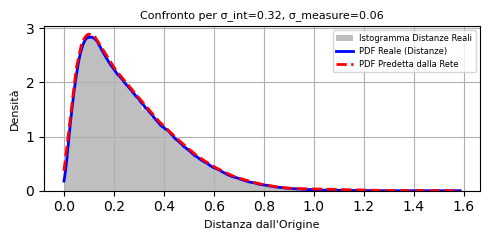

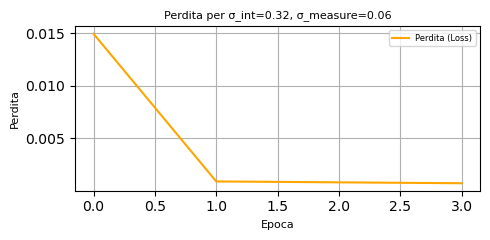

Generazione dati sintetici - Tempo impiegato: 0.0468 secondi
KDE Fitting e Scoring - Tempo impiegato: 0.3615 secondi
Ordinamento e ricerca indici - Tempo impiegato: 0.0784 secondi
Addestramento per sigma_int=0.68, sigma_measure=0.01
Addestramento rete neurale - Tempo impiegato: 112.0061 secondi


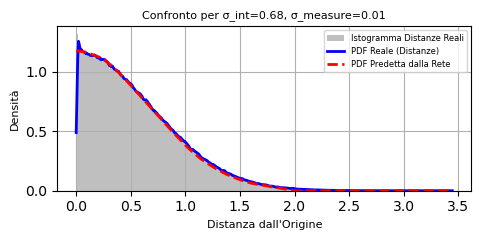

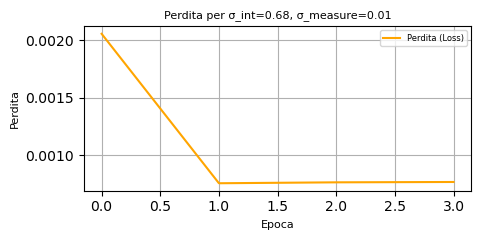

Generazione dati sintetici - Tempo impiegato: 0.0470 secondi
KDE Fitting e Scoring - Tempo impiegato: 0.8323 secondi
Ordinamento e ricerca indici - Tempo impiegato: 0.0944 secondi
Addestramento per sigma_int=0.21, sigma_measure=0.04
Addestramento rete neurale - Tempo impiegato: 148.9404 secondi


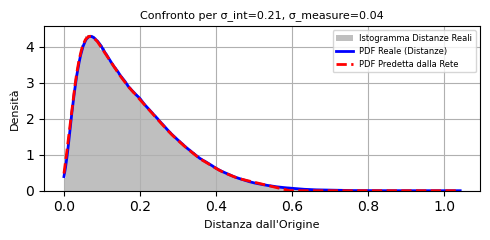

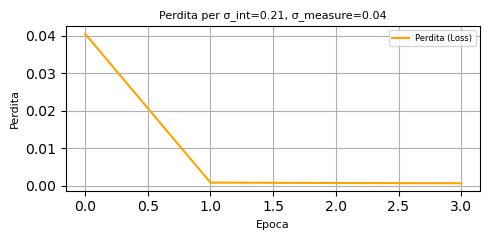

Generazione dati sintetici - Tempo impiegato: 0.0475 secondi
KDE Fitting e Scoring - Tempo impiegato: 0.5334 secondi
Ordinamento e ricerca indici - Tempo impiegato: 0.0942 secondi
Addestramento per sigma_int=0.47, sigma_measure=0.05
Addestramento rete neurale - Tempo impiegato: 121.5823 secondi


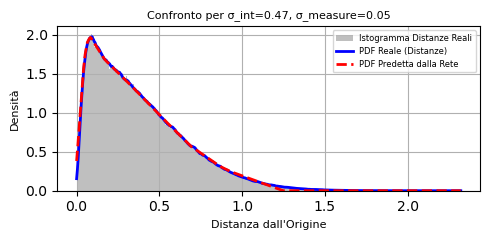

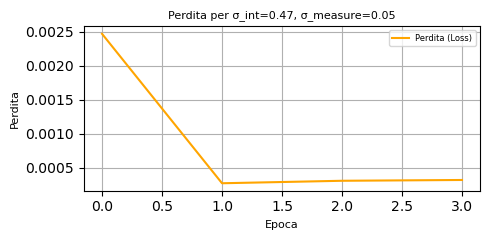

Generazione dati sintetici - Tempo impiegato: 0.0469 secondi
KDE Fitting e Scoring - Tempo impiegato: 1.1865 secondi
Ordinamento e ricerca indici - Tempo impiegato: 0.1017 secondi
Addestramento per sigma_int=0.13, sigma_measure=0.02
Addestramento rete neurale - Tempo impiegato: 194.6964 secondi


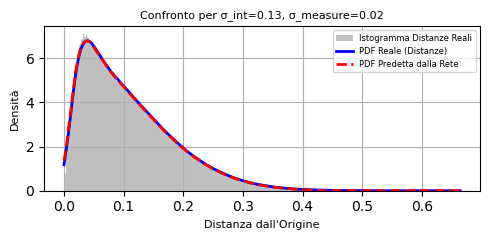

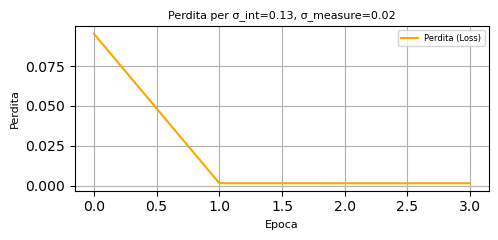

In [93]:
import time
import numpy as np
from sklearn.neighbors import KernelDensity
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from pyDOE import lhs

# 1. Generazione della griglia LHS
num_points = 5  # Numero di punti LHS
lhs_samples = lhs(2, samples=num_points)
sigma_int_lhs = lhs_samples[:, 0] * 0.7 # Prima variabile
sigma_measure_lhs = lhs_samples[:, 1] * 0.075   # Seconda variabile
params_array = np.vstack((sigma_int_lhs, sigma_measure_lhs)).T

# Funzione per cronometrare il tempo
def timeit(msg):
    def decorator(func):
        def wrapper(*args, **kwargs):
            start_time = time.time()
            result = func(*args, **kwargs)
            end_time = time.time()
            print(f"{msg} - Tempo impiegato: {end_time - start_time:.4f} secondi")
            return result
        return wrapper
    return decorator

# 2. Funzione per generare dati e calcolare la PDF
@timeit("Generazione dati sintetici")
def generate_synthetic_data(sigma_int, sigma_measure, num_samples):
    data_x = np.random.normal(0, sigma_int, num_samples).astype(np.float32)
    data_y = np.random.normal(0, sigma_measure, num_samples).astype(np.float32)
    data = np.vstack((data_x, data_y)).T
    distances = np.sqrt(data[:, 0]**2 + data[:, 1]**2).astype(np.float32)
    return distances

# 3. Rete neurale con output positivo
class ComplexNN(nn.Module):
    def __init__(self):
        super(ComplexNN, self).__init__()
        self.fc1 = nn.Linear(1, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return self.relu(x)

# 4. Funzione di perdita (Mean Squared Error)
def mse_loss(y_true, y_pred):
    loss = torch.mean((y_true - y_pred) ** 2)
    return loss

# 5. Funzione di addestramento della rete neurale
@timeit("Addestramento rete neurale")
def train_neural_network(model, data_loader, optimizer, num_epochs):
    loss_history = []
    model.train()  # Setto il modello in modalità di addestramento
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        
        for inputs, targets in data_loader:
            optimizer.zero_grad()  # Resetta i gradienti
            
            # Calcolo l'output del modello
            outputs = model(inputs)
            
            # Calcolo la perdita
            loss = mse_loss(targets, outputs)
            
            # Backpropagation
            loss.backward()
            
            # Aggiorno i pesi
            optimizer.step()
            
            # Aggiungi il valore della perdita all'epoch_loss
            epoch_loss += loss.item()  # Usa loss.item() per evitare di trattenere il grafo computazionale

        # Calcolo la perdita media per l'epoca
        avg_loss = epoch_loss / len(data_loader)
        loss_history.append(avg_loss)
        
        # Stampa la perdita ogni 10 epoche (evita un eccessivo output)
        if (epoch + 1) % 10 == 0:
            print(f'Epoca [{epoch + 1}/{num_epochs}], Perdita: {avg_loss:.6f}')
    
    return loss_history

# 6. Addestramento della rete su tutti i parametri LHS
num_samples = 800000
num_epochs = 4

# Inizializza la rete neurale UNA SOLA VOLTA
model = ComplexNN()

for sigma_int, sigma_measure in params_array:
    distances = generate_synthetic_data(sigma_int, sigma_measure, num_samples)
    
    # Kernel Density Estimation
    kde_start_time = time.time()
    bandwidth = 0.014
    kde = KernelDensity(kernel='tophat',bandwidth=bandwidth)
    kde.fit(distances[:, np.newaxis])
    x_vals = np.linspace(0, np.max(distances), 500)[:, np.newaxis]
    log_density = kde.score_samples(x_vals)
    pdf_values = np.exp(log_density)
    kde_end_time = time.time()
    print(f"KDE Fitting e Scoring - Tempo impiegato: {kde_end_time - kde_start_time:.4f} secondi")

    # Ordinamento e ricerca indici
    sorting_start_time = time.time()
    distances_sorted_indices = np.argsort(distances)
    distances_sorted = distances[distances_sorted_indices]
    indices = np.searchsorted(x_vals.flatten(), distances_sorted, side='left')
    indices = np.clip(indices, 0, len(x_vals) - 1)
    targets = pdf_values[indices]
    sorting_end_time = time.time()
    print(f"Ordinamento e ricerca indici - Tempo impiegato: {sorting_end_time - sorting_start_time:.4f} secondi")

    # Prepara i dati per l'addestramento
    distances_tensor = torch.tensor(distances_sorted, dtype=torch.float32).view(-1, 1)
    targets_tensor = torch.tensor(targets, dtype=torch.float32).view(-1, 1)
    
    batch_size = 512
    dataset = torch.utils.data.TensorDataset(distances_tensor, targets_tensor)
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    # Reinizializza l'ottimizzatore per ogni nuovo set di dati
    optimizer = optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-4)
    
    print(f'Addestramento per sigma_int={sigma_int:.2f}, sigma_measure={sigma_measure:.2f}')
    loss_history = train_neural_network(model, data_loader, optimizer, num_epochs)
    
    # Predizione finale della PDF con la rete addestrata
    model.eval()
    with torch.no_grad():
        x_vals_tensor = torch.tensor(x_vals, dtype=torch.float32)
        predictions = model(x_vals_tensor).numpy()
    
    # Visualizzazione
    plt.figure(figsize=(5, 2.5))
    plt.hist(distances, bins=500, density=True, alpha=0.5, color='gray', label='Istogramma Distanze Reali')
    plt.plot(x_vals, pdf_values, label='PDF Reale (Distanze)', color='blue', linewidth=2)
    plt.plot(x_vals, predictions, label='PDF Predetta dalla Rete', color='red', linestyle='--', linewidth=2)
    plt.title(f'Confronto per σ_int={sigma_int:.2f}, σ_measure={sigma_measure:.2f}', fontsize=8)
    plt.xlabel('Distanza dall\'Origine', fontsize=8)
    plt.ylabel('Densità', fontsize=8)
    plt.legend(fontsize=6)
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # Grafico della perdita
    plt.figure(figsize=(5, 2.5))
    plt.plot(loss_history, label='Perdita (Loss)', color='orange')
    plt.title(f'Perdita per σ_int={sigma_int:.2f}, σ_measure={sigma_measure:.2f}', fontsize=8)
    plt.xlabel('Epoca', fontsize=8)
    plt.ylabel('Perdita', fontsize=8)
    plt.legend(fontsize=6)
    plt.grid()
    plt.tight_layout()
    plt.show()

   

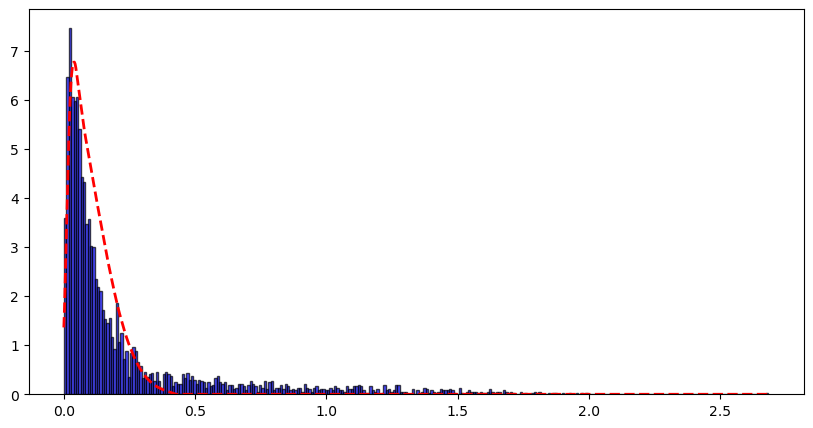

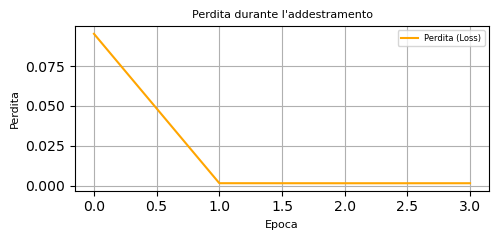

In [94]:
 # Leggi il CSV
data = pd.read_csv('dati.csv')
distance = data['DISTANCE'].values

# Prepara i dati per la predizione
distance_tensor = torch.tensor(distance, dtype=torch.float32).view(-1, 1)

# Predizione finale della PDF con la rete addestrata
model.eval()
with torch.no_grad():
    predictions = model(distance_tensor).numpy()

# Crea l'istogramma
plt.figure(figsize=(10, 5))
plt.hist(distance, bins=300, density=True, color='blue', alpha=0.7, edgecolor='black', label='Istogramma delle Distanze')

# Calcola e plotta la PDF predetta dalla rete
x_vals = np.linspace(0, np.max(distance), 1000)[:, np.newaxis]
with torch.no_grad():
    x_vals_tensor = torch.tensor(x_vals, dtype=torch.float32)
    predicted_pdf = model(x_vals_tensor).numpy()
    
plt.plot(x_vals, predicted_pdf, label='PDF Predetta dalla Rete', color='red', linestyle='--', linewidth=2)

# Grafico della perdita (Loss)
plt.figure(figsize=(5, 2.5))
plt.plot(loss_history, label='Perdita (Loss)', color='orange')
plt.title(f'Perdita durante l\'addestramento', fontsize=8)
plt.xlabel('Epoca', fontsize=8)
plt.ylabel('Perdita', fontsize=8)
plt.legend(fontsize=6)
plt.grid()
plt.tight_layout()
plt.show()